## Steps: 

1. Apply K-Means Clustering (elbow method to determine K). 
2. Perform Hierarchical Clustering (dendrogram analysis). 
3. Compare clusters with actual disease labels.

In [1]:
# Load the dataset
import pandas as pd

# df = pd.read_csv('../data/selected_features_heart_disease.csv')
df = pd.read_csv('../data/processed_heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,1,1,0.750380,-0.276443,1,2,0.017494,0,1.068965,3,-0.721976,2,0
1,1.378929,1,4,-0.659431,-0.353500,0,2,-0.899420,1,1.326662,2,1.411625,3,1
2,-1.941680,1,3,-0.095506,0.051047,0,0,1.633010,0,2.099753,3,-0.721976,1,0
3,-1.498933,0,2,-0.095506,-0.835103,0,2,0.978071,0,0.295874,1,-0.721976,1,0
4,0.161372,1,2,-0.659431,-0.218651,0,0,1.240047,0,-0.219520,1,-0.721976,1,0


## 1. Apply K-Means Clustering (elbow method to determine K). 

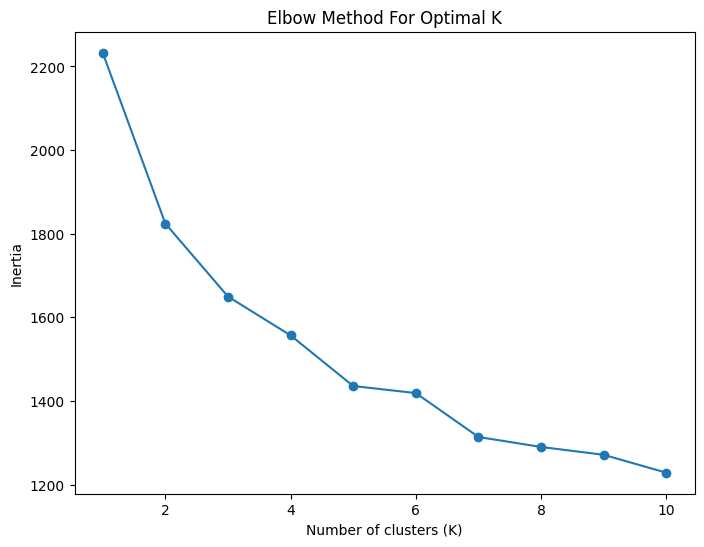

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df.drop('num', axis=1)

# Elbow method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

## 2. Perform Hierarchical Clustering (dendrogram analysis). 

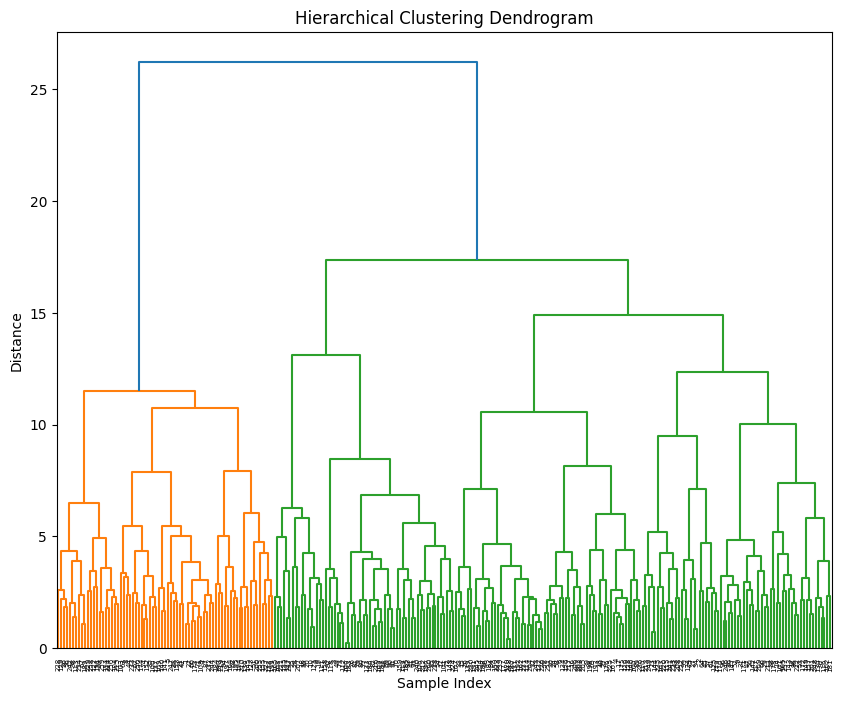

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, method='ward')

plt.figure(figsize=(10, 8))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## 3. Compare clusters with actual disease labels.

In [4]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix, normalized_mutual_info_score

optimal_k = 2
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(X)

actual_labels = df['num']

cm = confusion_matrix(actual_labels, cluster_labels)
print("Confusion Matrix:\n", cm)

ari = adjusted_rand_score(actual_labels, cluster_labels)
print("Adjusted Rand Index:", ari)

nmi = normalized_mutual_info_score(actual_labels, cluster_labels)
print("Normalized Mutual Information:", nmi)

Confusion Matrix:
 [[ 28 123]
 [ 85  25]]
Adjusted Rand Index: 0.34999835085969216
Normalized Mutual Information: 0.26495489274144446
